
Example 1: Simple repeating pattern
Input text: TOBEORNOTTOBEORTOBEORNOT

Processing: 'T'
Current string: ''
Looking up: 'T'
Found in dictionary, continuing...

Processing: 'O'
Current string: 'T'
Looking up: 'TO'
Adding to dictionary: 'TO' -> 256

Processing: 'B'
Current string: 'O'
Looking up: 'OB'
Adding to dictionary: 'OB' -> 257

Processing: 'E'
Current string: 'B'
Looking up: 'BE'
Adding to dictionary: 'BE' -> 258

Processing: 'O'
Current string: 'E'
Looking up: 'EO'
Adding to dictionary: 'EO' -> 259

Processing: 'R'
Current string: 'O'
Looking up: 'OR'
Adding to dictionary: 'OR' -> 260

Processing: 'N'
Current string: 'R'
Looking up: 'RN'
Adding to dictionary: 'RN' -> 261

Processing: 'O'
Current string: 'N'
Looking up: 'NO'
Adding to dictionary: 'NO' -> 262

Processing: 'T'
Current string: 'O'
Looking up: 'OT'
Adding to dictionary: 'OT' -> 263

Processing: 'T'
Current string: 'T'
Looking up: 'TT'
Adding to dictionary: 'TT' -> 264

Processing: 'O'
Current string: 'T'
Looking up

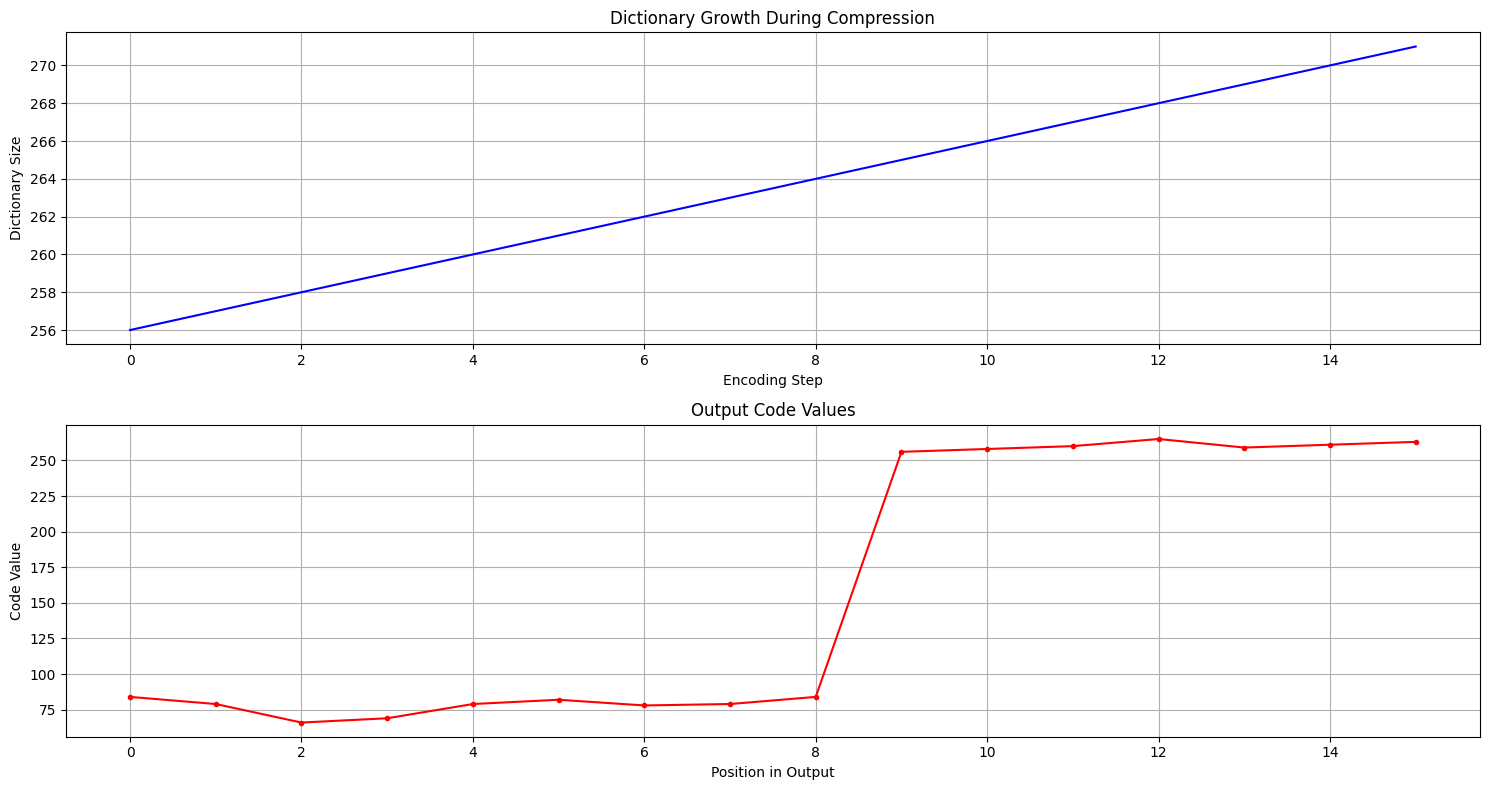


Example 2: Repeating pattern
Input text: BABAABAAABABAABAAABABAABAAA

Encoding results:
Original length: 27 bytes
Compressed length: 13 codes


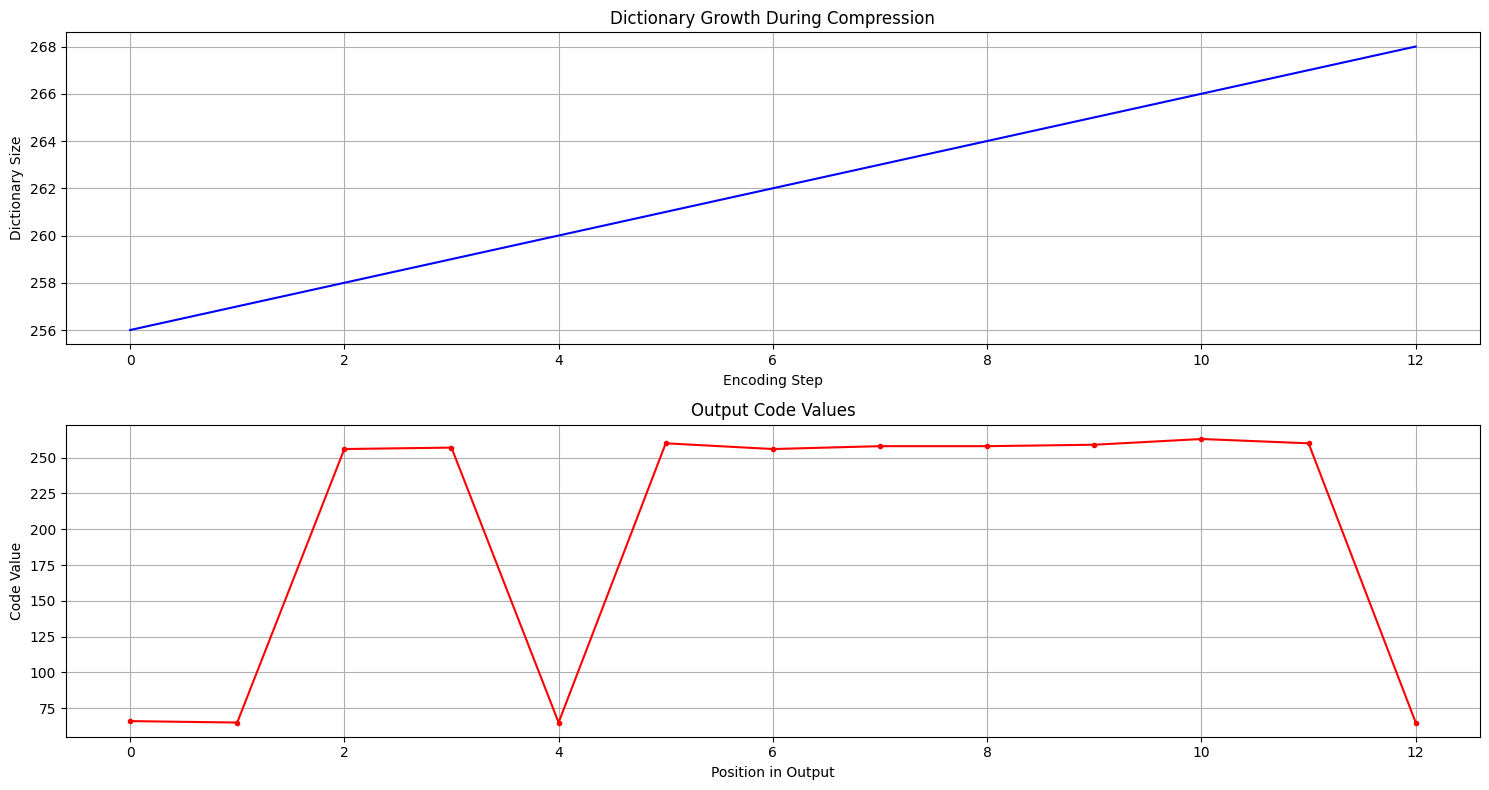

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

class LZWCompressor:
    """
    Implements LZW compression with detailed tracking of dictionary evolution.
    Includes visualization capabilities to show how the dictionary grows.
    """
    def __init__(self, max_dict_size=65536):
        self.max_dict_size = max_dict_size

    def initialize_dictionary(self):
        """Create initial dictionary with single-character strings."""
        # Start with ASCII characters 0-255
        return {chr(i): i for i in range(256)}

    def encode(self, text, verbose=False):
        """
        Encode text using LZW algorithm while tracking dictionary evolution.

        Parameters:
            text: Input string to compress
            verbose: If True, prints detailed steps of the encoding process

        Returns:
            encoded_data: List of codes
            encoding_steps: List of dictionaries showing dictionary evolution
        """
        # Initialize
        dictionary = self.initialize_dictionary()
        next_code = len(dictionary)
        current = ""
        encoded = []

        # Track evolution of dictionary
        encoding_steps = []

        for char in text:
            current_plus_char = current + char

            if verbose:
                print(f"\nProcessing: '{char}'")
                print(f"Current string: '{current}'")
                print(f"Looking up: '{current_plus_char}'")

            if current_plus_char in dictionary:
                current = current_plus_char
                if verbose:
                    print(f"Found in dictionary, continuing...")
            else:
                # Output code for current string
                encoded.append(dictionary[current])

                # Add new string to dictionary if space remains
                if next_code < self.max_dict_size:
                    if verbose:
                        print(f"Adding to dictionary: '{current_plus_char}' -> {next_code}")
                    dictionary[current_plus_char] = next_code
                    next_code += 1

                # Track dictionary state
                encoding_steps.append({
                    'position': len(encoded) - 1,
                    'encoded': encoded[-1],
                    'new_phrase': current_plus_char,
                    'dict_size': len(dictionary)
                })

                current = char

        # Handle last characters
        if current:
            encoded.append(dictionary[current])

        return encoded, encoding_steps

    def decode(self, encoded_data, verbose=False):
        """
        Decode LZW-compressed data while tracking dictionary reconstruction.

        Parameters:
            encoded_data: List of codes to decompress
            verbose: If True, prints detailed steps of the decoding process

        Returns:
            decoded_text: Reconstructed text
            decoding_steps: List of dictionaries showing dictionary evolution
        """
        # Initialize dictionary (reverse of encoding dictionary)
        dictionary = {i: chr(i) for i in range(256)}
        next_code = len(dictionary)
        decoded = []
        decoding_steps = []

        # Handle first code separately
        if encoded_data:
            decoded.append(dictionary[encoded_data[0]])
            previous = dictionary[encoded_data[0]]

        for code in encoded_data[1:]:
            if verbose:
                print(f"\nProcessing code: {code}")

            # Handle dictionary lookup
            if code in dictionary:
                current = dictionary[code]
            else:
                # Special case: new code is being processed
                current = previous + previous[0]

            decoded.append(current)

            # Add new string to dictionary
            if next_code < self.max_dict_size:
                new_phrase = previous + current[0]
                if verbose:
                    print(f"Adding to dictionary: '{new_phrase}' -> {next_code}")
                dictionary[next_code] = new_phrase
                next_code += 1

                # Track dictionary evolution
                decoding_steps.append({
                    'position': len(decoded) - 1,
                    'decoded': current,
                    'new_phrase': new_phrase,
                    'dict_size': len(dictionary)
                })

            previous = current

        return ''.join(decoded), decoding_steps

def visualize_compression(text, encoded_data, encoding_steps):
    """Create visualization showing how the dictionary grows during compression."""
    plt.figure(figsize=(15, 8))

    # Plot dictionary size growth
    plt.subplot(211)
    dict_sizes = [256] + [step['dict_size'] for step in encoding_steps]
    plt.plot(dict_sizes, 'b-', label='Dictionary Size')
    plt.title('Dictionary Growth During Compression')
    plt.xlabel('Encoding Step')
    plt.ylabel('Dictionary Size')
    plt.grid(True)

    # Plot code values
    plt.subplot(212)
    plt.plot(encoded_data, 'r.-', label='Output Codes')
    plt.title('Output Code Values')
    plt.xlabel('Position in Output')
    plt.ylabel('Code Value')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def demonstrate_lzw():
    """Demonstrate LZW compression with a variety of example inputs."""
    compressor = LZWCompressor()

    # Example 1: Simple repeating pattern
    text1 = "TOBEORNOTTOBEORTOBEORNOT"
    print("\nExample 1: Simple repeating pattern")
    print(f"Input text: {text1}")

    encoded1, steps1 = compressor.encode(text1, verbose=True)
    decoded1, _ = compressor.decode(encoded1)

    print("\nEncoding results:")
    print(f"Original length: {len(text1)} bytes")
    print(f"Compressed length: {len(encoded1)} codes")
    print(f"Dictionary entries added: {len(steps1)}")
    print("\nDictionary evolution:")
    for step in steps1:
        print(f"Added phrase: '{step['new_phrase']}' at position {step['position']}")

    # Visualize the compression
    visualize_compression(text1, encoded1, steps1)

    # Example 2: Pattern with repetition
    text2 = "BABAABAAA" * 3
    print("\nExample 2: Repeating pattern")
    print(f"Input text: {text2}")

    encoded2, steps2 = compressor.encode(text2)
    decoded2, _ = compressor.decode(encoded2)

    print("\nEncoding results:")
    print(f"Original length: {len(text2)} bytes")
    print(f"Compressed length: {len(encoded2)} codes")

    # Visualize the compression
    visualize_compression(text2, encoded2, steps2)

    return compressor

# Run the demonstration with error handling
try:
    compressor = demonstrate_lzw()
except Exception as e:
    print(f"An error occurred: {str(e)}")